In [76]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

from experiment_utils import *
from src import *



In [77]:
def metric_has_substring(metric, substrings):
    for sub in substrings:
        if sub in metric:
            return True
    return False

In [78]:
results_filename = "MAIN_3_models_race_sex"
results_filename = "MAIN_KL_W_race"

results_file = os.path.join("results",results_filename +".csv")
reader = ResultsReader(results_file)

all_metrics = reader.metrics
metrics_to_use = ["SF", "accu"]
metrics_to_display = [m for m in all_metrics if metric_has_substring(m, metrics_to_use)]# +[OtherColReader.ACC_SF_TO]

for col in ResultsReader.FILTERABLE:
    print(reader.get_all_column_values(col))
    
print(reader.columns_shown)


File 'results\MAIN_KL_W_race.csv' successfully loaded as DataFrame.
['Adult Dataset', 'Compas Dataset']
['LogisticRegression', 'SupportVectorClassifier']
["['race']"]
['FYP VAE', 'LFR', 'Reweighing Bias Mitigation', 'FairBalance Bias Mitigation', 'FairMask Bias Mitigation', 'No Bias Mitigation']
['{\'c\': \'FYP\', \'my model config\': "VAEMaskConfig(epochs=1500, latent_dim=30, mask_values=None vae_layers=(75, 60, 30, 30), lr=0.006, \\nlosses_used=[\'Reconstruction loss\', \'KL divergence loss\'])Reconstruction loss: {\'weight\': 15}, KL divergence loss: {\'weight\': 0.01}, Latent sens ADV loss: {\'weight\': 0.1, \'lr\': 0.05, \'optimizer\': \'Adam\', \'layers\': (75, 30, 10), \'input_dim\': 29}, Flipped ADV loss: {\'weight\': 0.01, \'lr\': 0.05, \'optimizer\': \'Adam\', \'layers\': (75, 30, 10), \'input_dim\': 25, \'sens_col_ids\': [23]}, Sensitive KL loss: {\'weight\': 9000, \'sens_col_ids\': [23]}, Pos Y vec loss: {\'weight\': 1200000}"}', "{'c': 'LFR'}", '{}', '{\'c\': \'FYP\', \'my

____________________________________________________________________________________________________
Adult Dataset , LogisticRegression ['race']


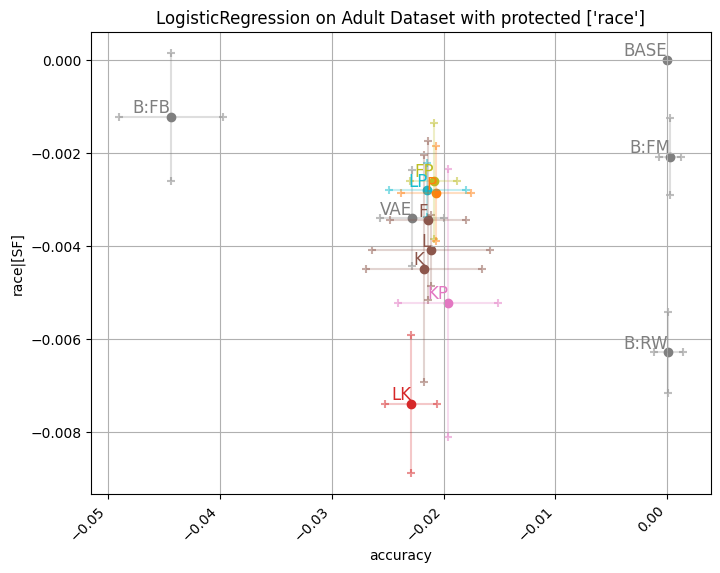

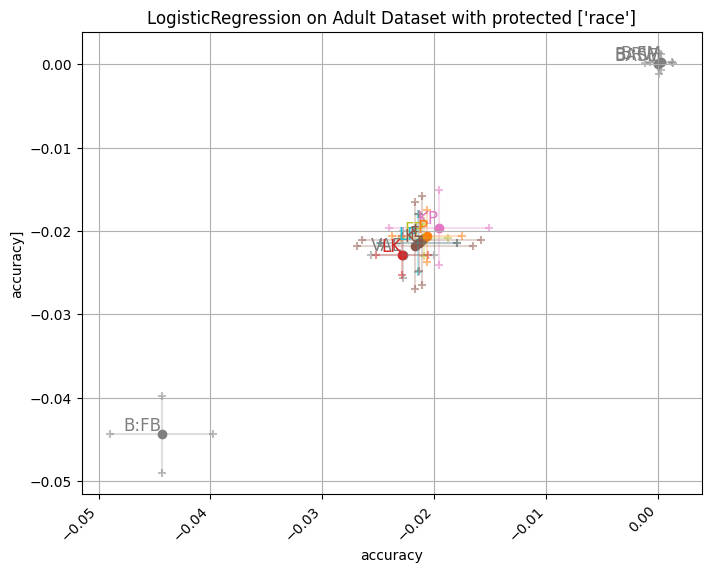

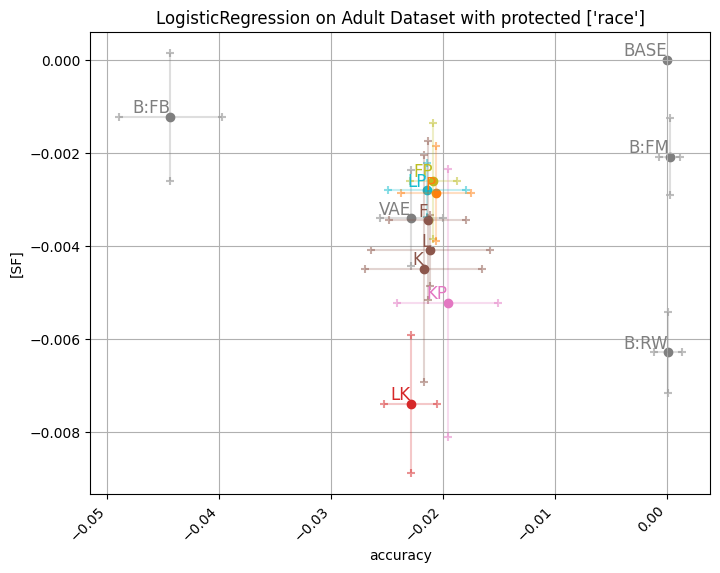

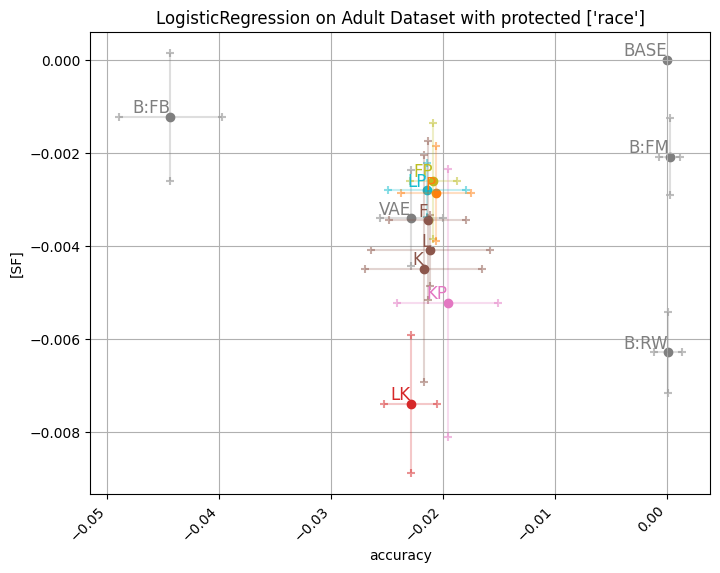

____________________________________________________________________________________________________
Adult Dataset , SupportVectorClassifier ['race']


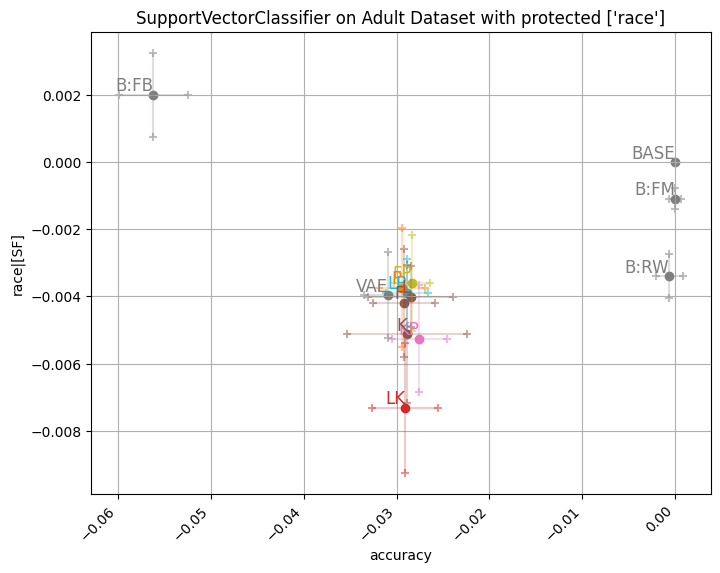

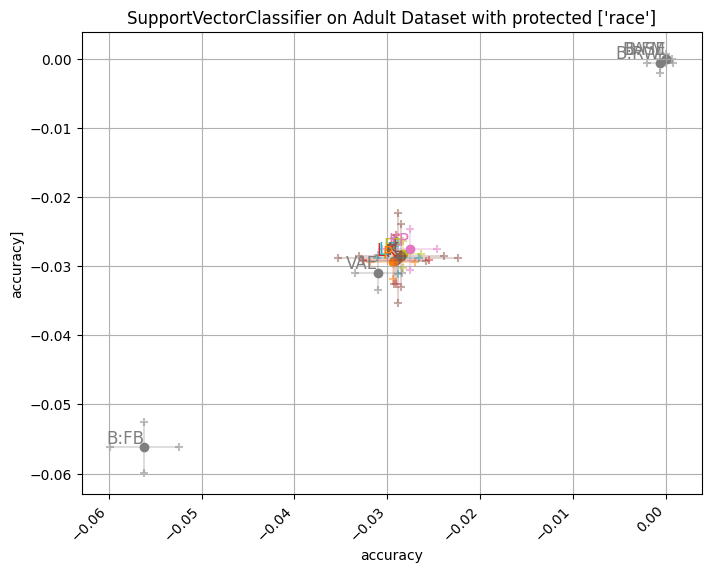

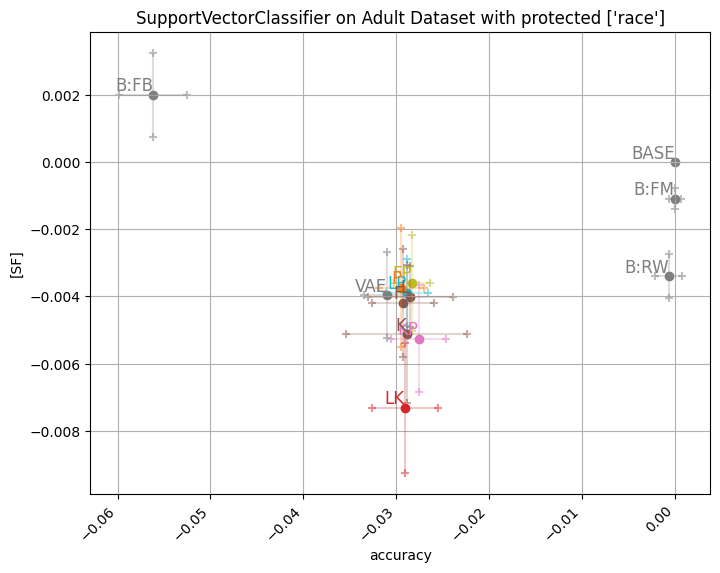

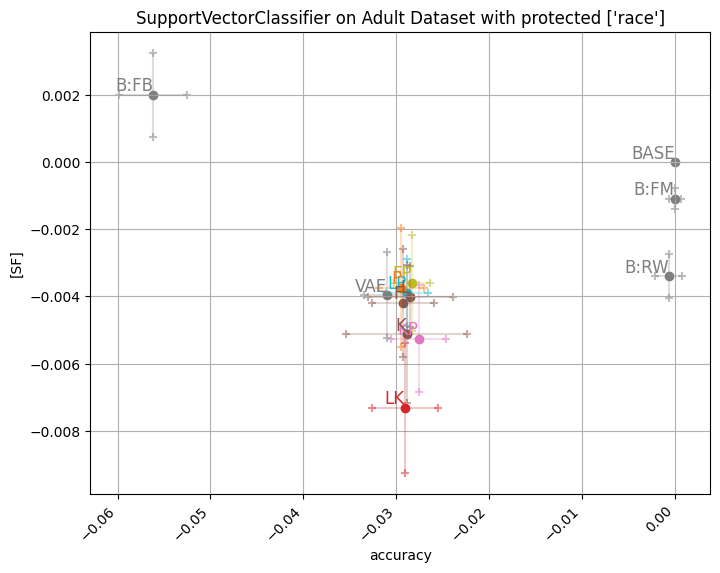

____________________________________________________________________________________________________
Compas Dataset , LogisticRegression ['race']


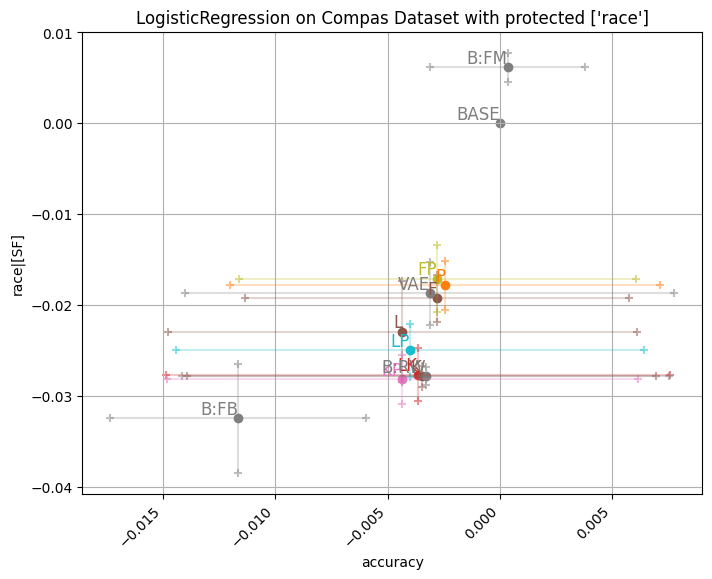

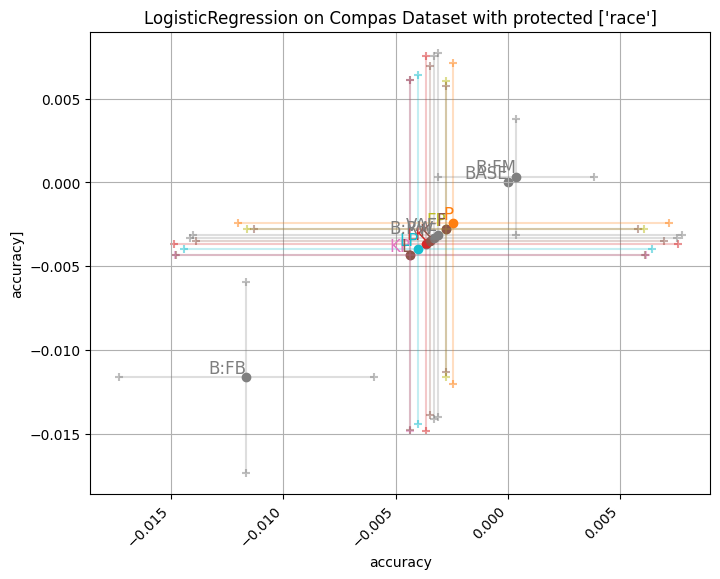

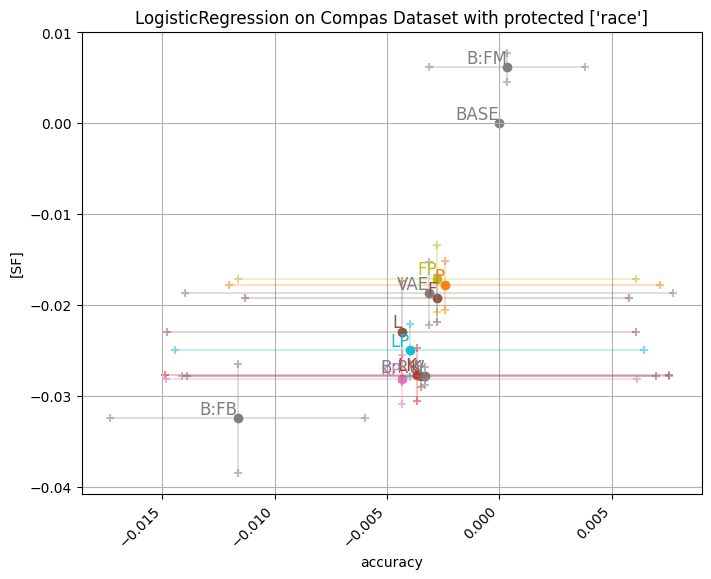

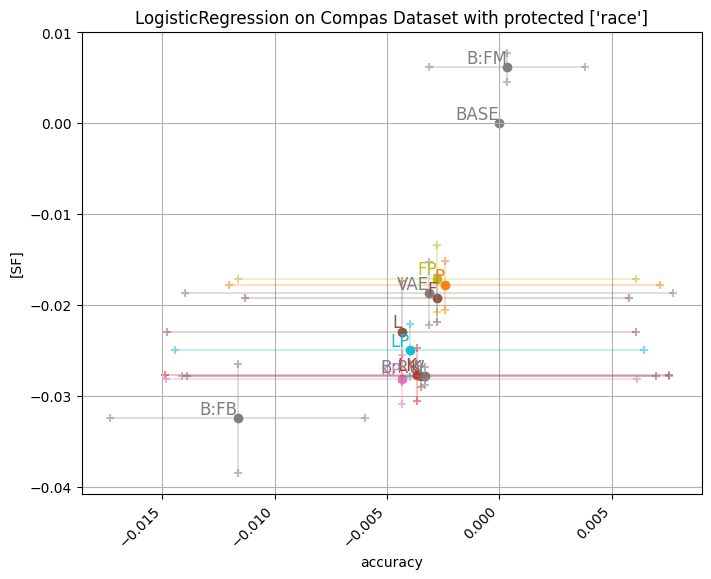

____________________________________________________________________________________________________
Compas Dataset , SupportVectorClassifier ['race']


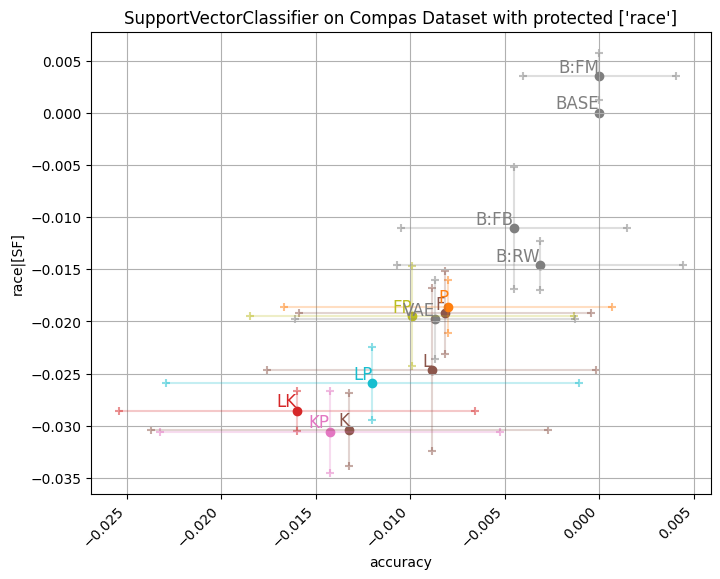

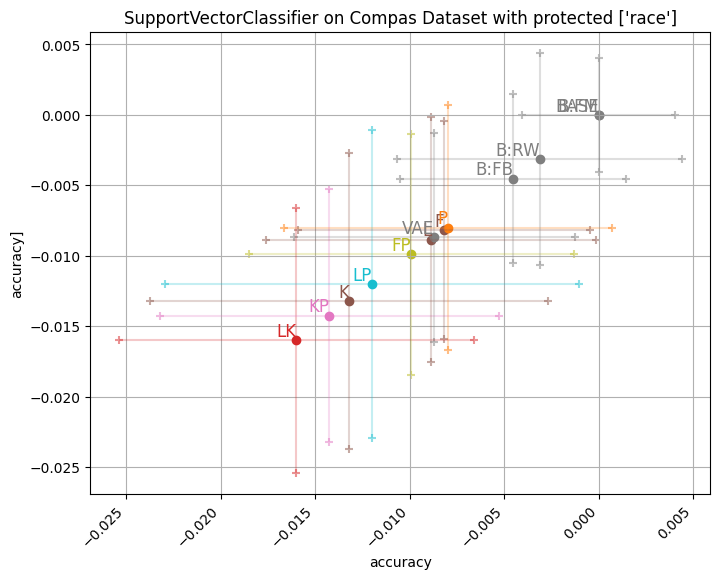

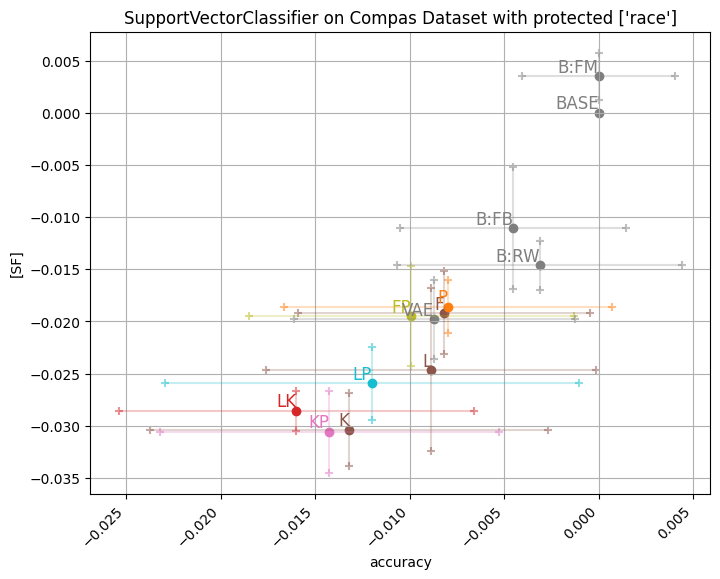

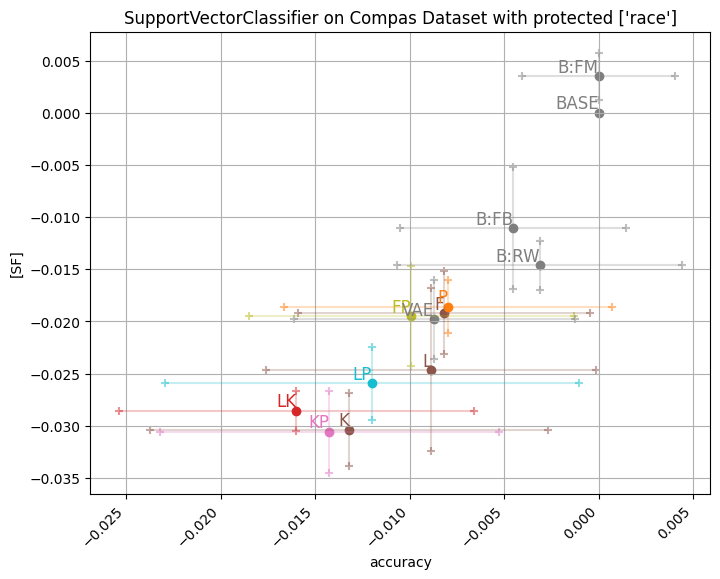

In [79]:
boo = True

if boo:

    def f(df):
        loss_a =  (df["other"].str.contains("Latent sens ADV loss"))  # (df["other"].str.contains("Sensitive KL loss")) 
        loss = loss_a | (df["other"].str.contains("Sensitive KL loss")) 
        general_mask = (df["data"].str.contains('German')) & (df["ML method"].str.contains('MLP'))
        performance_mask =  loss & (df["accuracy"]> -0.01 ) &(df["[SF] Statistical Parity Subgroup Fairness"]< -0.013 ) 
        #return df#[general_mask & ( performance_mask  | ~(df["other"].str.contains('FYP')) )]
        return df[~(df["other"].str.contains('LFR'))]
    reader.relative_metrics_filter = f

    grapher = ResultsGrapher(reader)
    grapher.show_legend = False
    #grapher.plot_metrics_vs_metric(mean=True, relative=False, metrics = metrics_to_display, metric = Metrics.MEAN_Y, style=grapher.STYLE_2D_STD)
    #grapher.plot_metrics_vs_metric(mean=False, relative=True, metrics = metrics_to_display, metric = OtherColReader.LOSSES, mean_all_same_loss=True)
    grapher.plot_metrics_vs_metric(mean=False, relative=True, metrics = metrics_to_display, style=grapher.STYLE_2D_STD)

    reader.clear_filters()


    relative= reader.get_relative_metrics()

    for r in relative['other']:
        #print(r)
        pass
        
    #relative


____________________________________________________________________________________________________
Adult Dataset , LogisticRegression ['race']


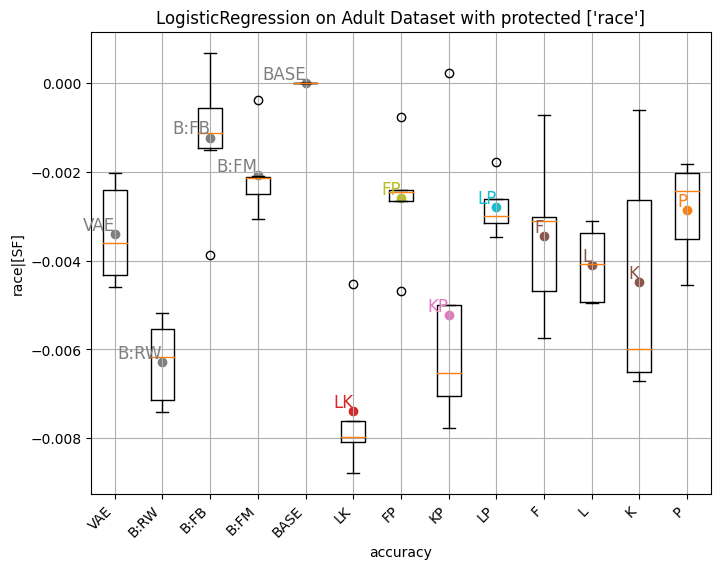

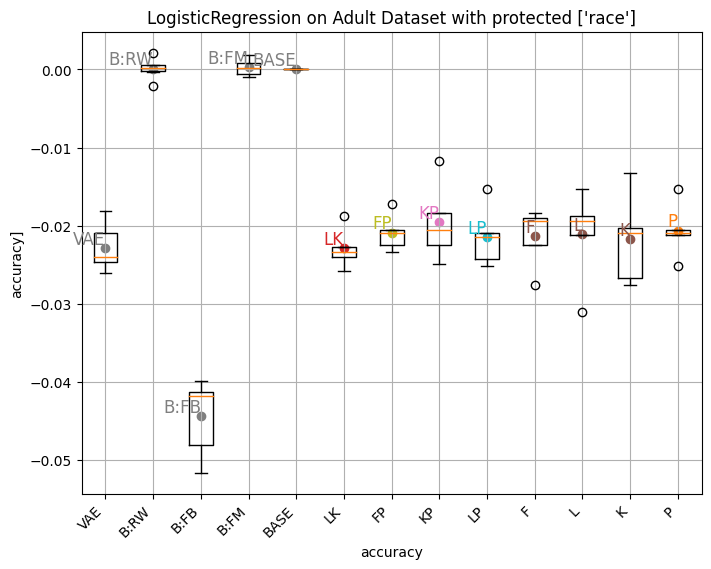

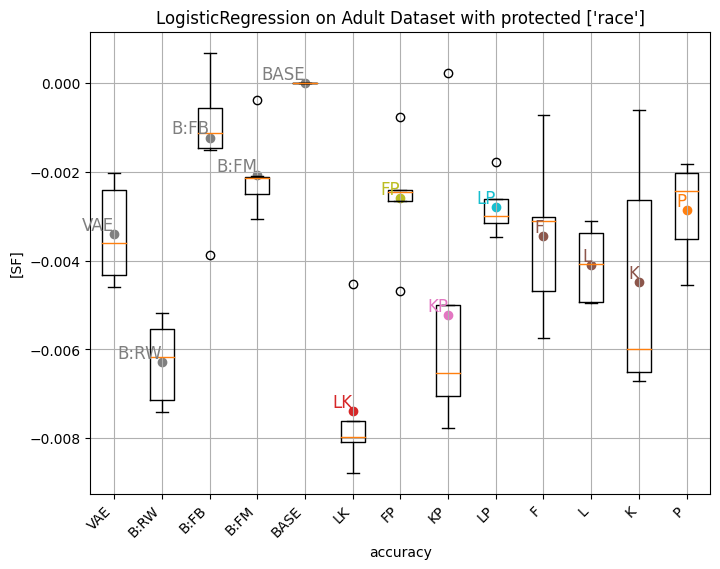

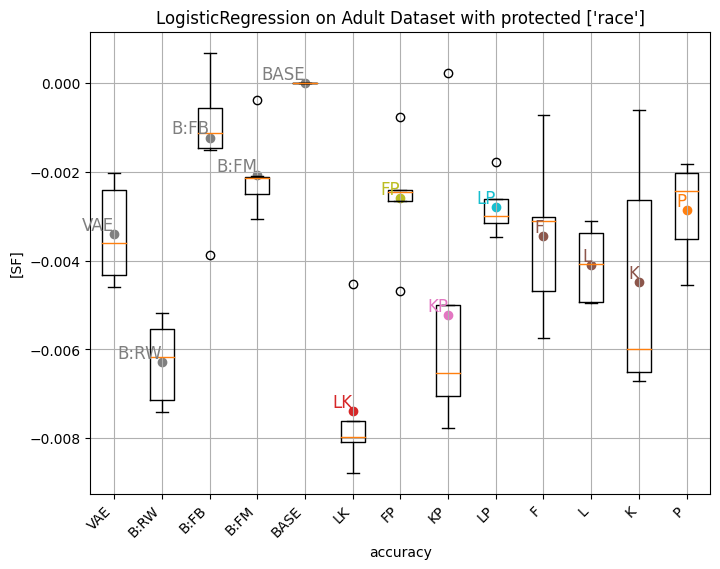

____________________________________________________________________________________________________
Adult Dataset , SupportVectorClassifier ['race']


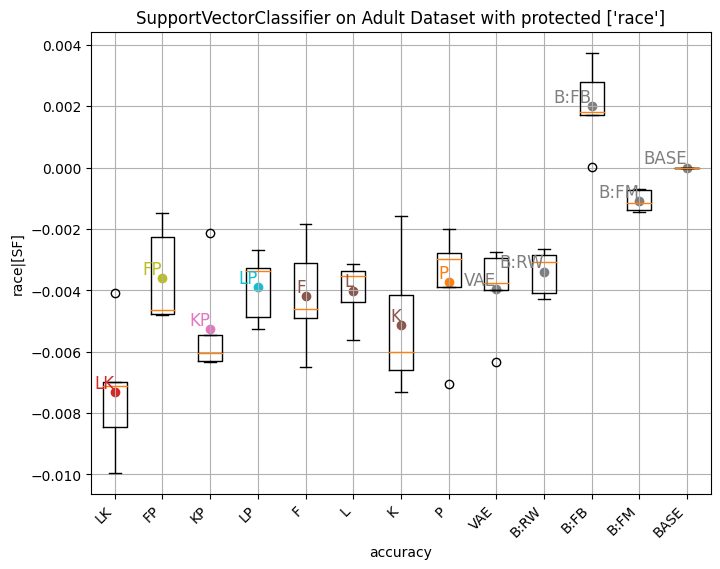

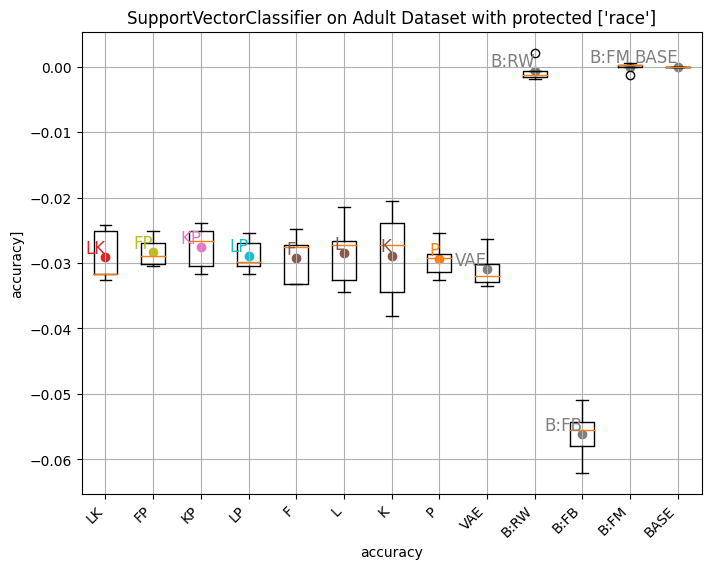

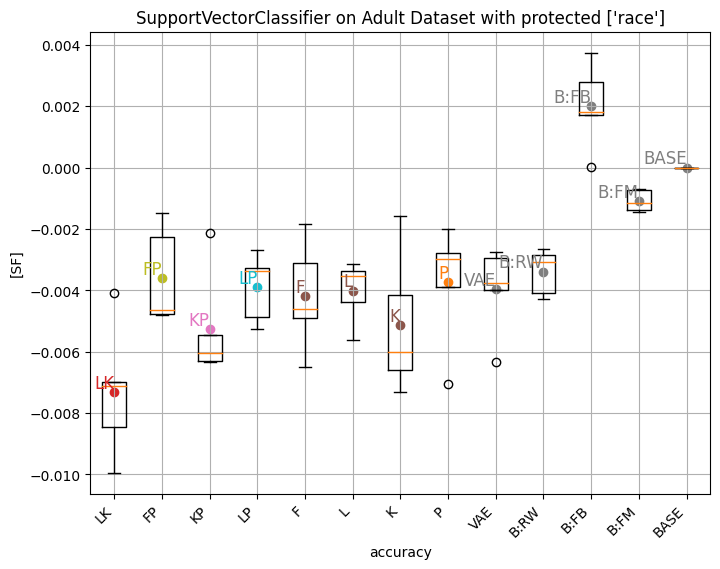

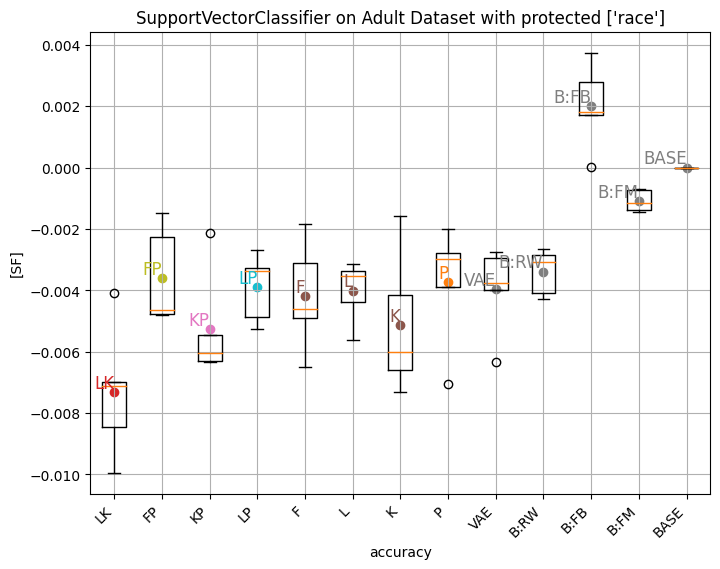

____________________________________________________________________________________________________
Compas Dataset , LogisticRegression ['race']


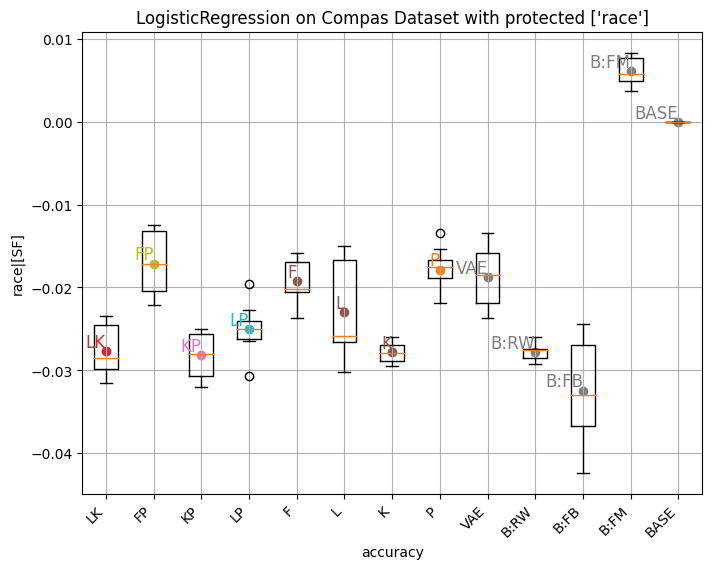

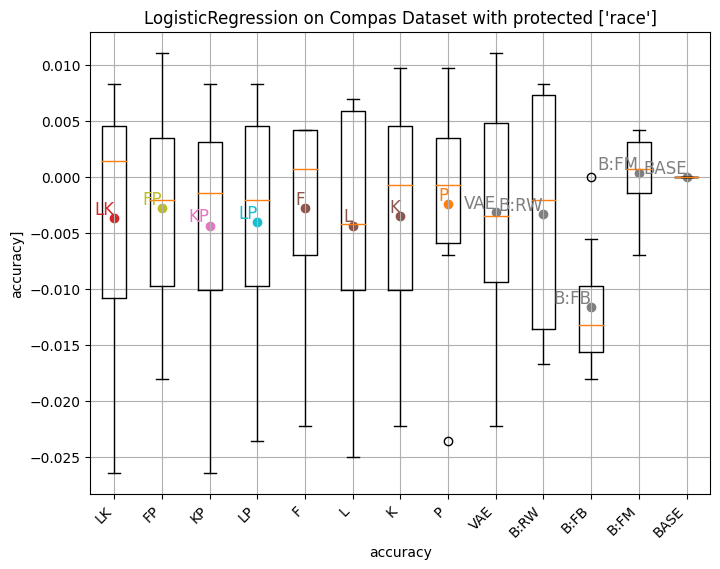

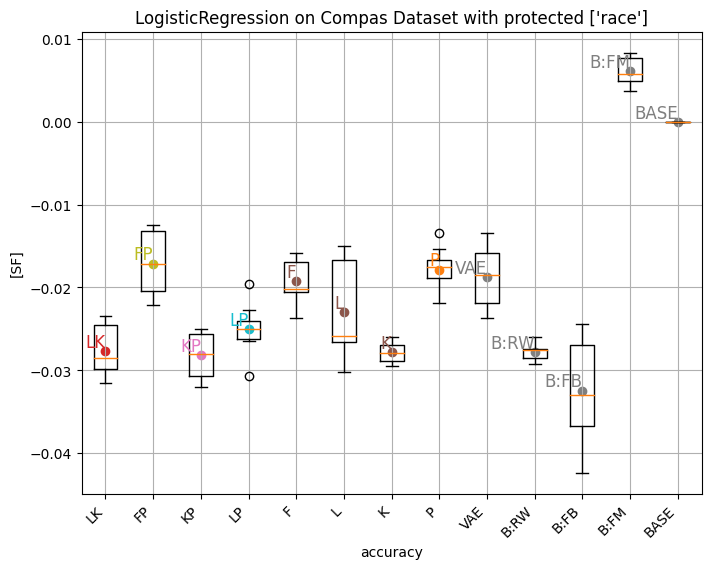

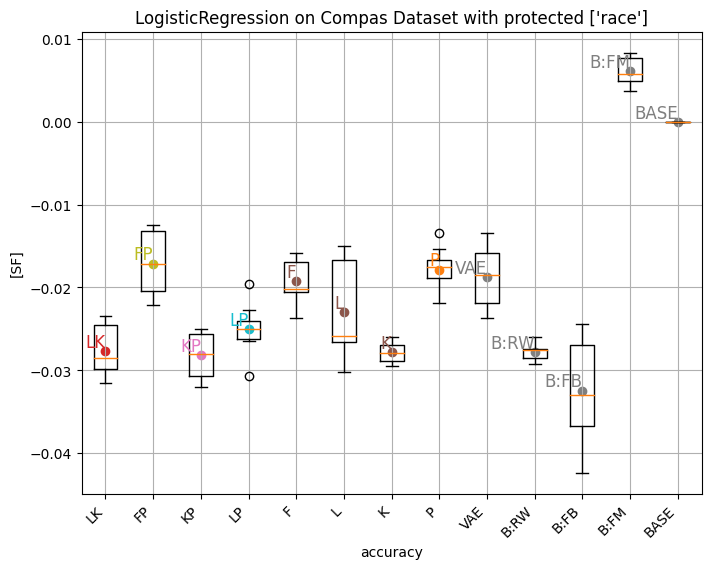

____________________________________________________________________________________________________
Compas Dataset , SupportVectorClassifier ['race']


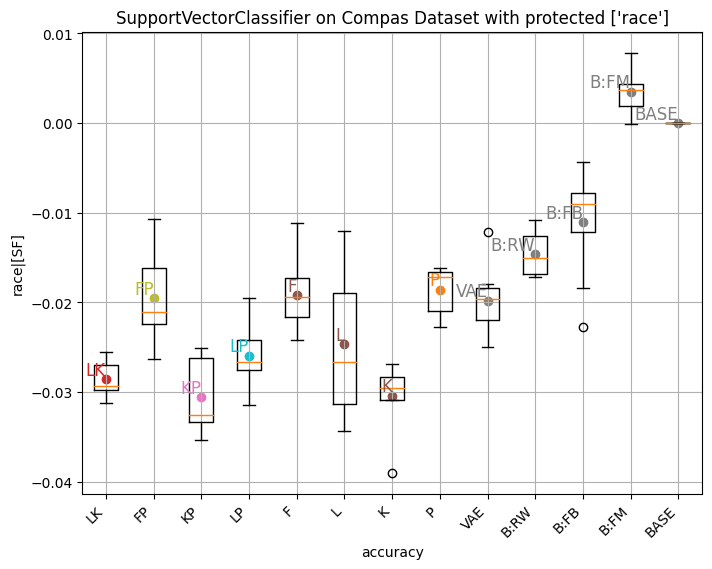

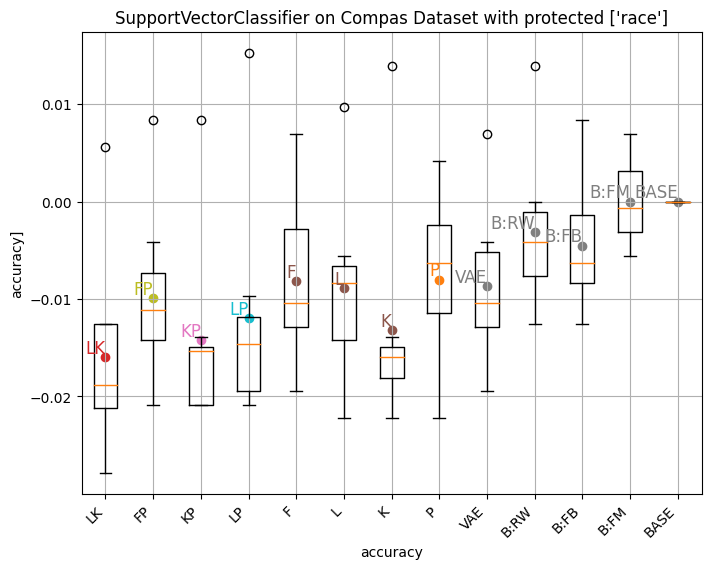

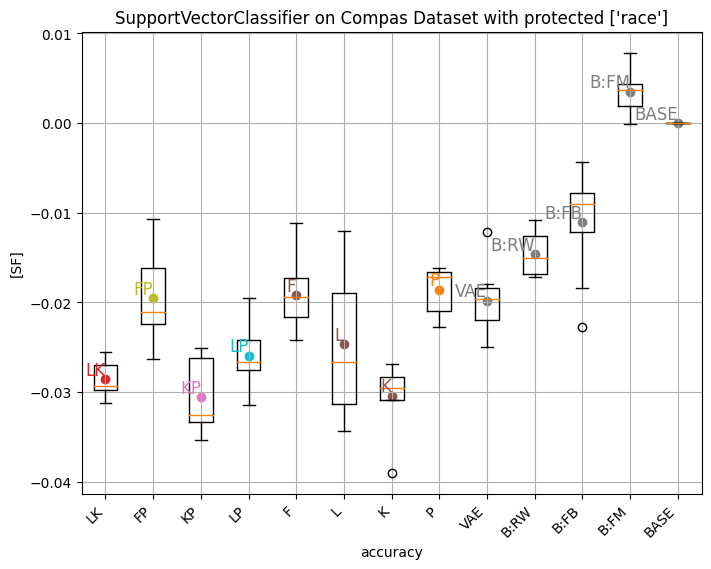

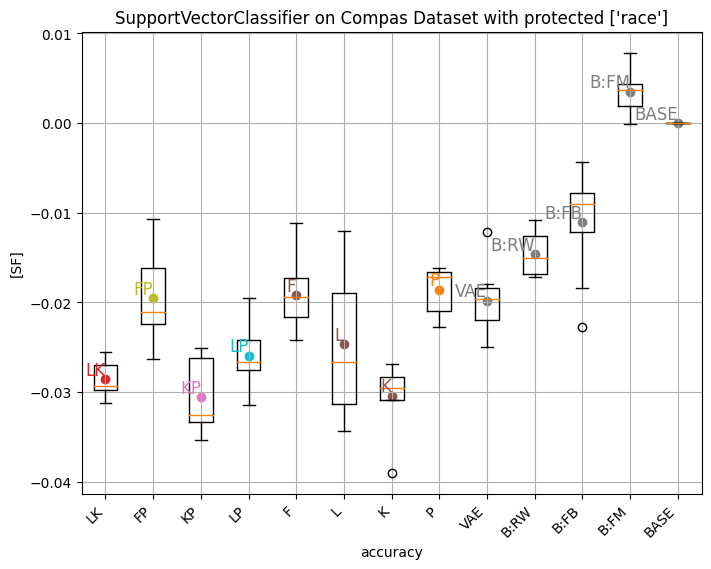

In [80]:

def f(df):
    loss_a =  (df["other"].str.contains("Latent sens ADV loss"))  # (df["other"].str.contains("Sensitive KL loss")) 
    loss = loss_a | (df["other"].str.contains("Sensitive KL loss")) 
    general_mask = (df["data"].str.contains('German')) & (df["ML method"].str.contains('MLP'))
    performance_mask =  loss & (df["accuracy"]> -0.01 ) &(df["[SF] Statistical Parity Subgroup Fairness"]< -0.013 ) 
    #return df#[general_mask & ( performance_mask  | ~(df["other"].str.contains('FYP')) )]
    return df[~(df["other"].str.contains('LFR'))]

reader.relative_metrics_filter = f

grapher = ResultsGrapher(reader)
grapher.show_legend = False
#grapher.plot_metrics_vs_metric(mean=False, relative=False, metrics = metrics_to_display, metric = Metrics.MEAN_Y)
grapher.plot_metrics_vs_metric(mean=False, relative=True, metrics = metrics_to_display, style=grapher.STYLE_IQR)
#grapher.plot_metrics_vs_metric(mean=False, relative=True, metrics = metrics_to_display, mean_var_same_label=True)